In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows=100
pd.options.display.max_columns=250

import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

In [2]:
data = pd.read_csv('movie_metadata.csv')

In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
imdb = pd.DataFrame(data, columns=['movie_title', 'gross', 'budget', 'genres', 'country', 'imdb_score'])

In [7]:
imdb.head()

,movie_title,gross,budget,genres,country,imdb_score
0,Avatar,760505847.0,237000000.0,Action|Adventure|Fantasy|Sci-Fi,USA,7.9
1,Pirates of the Caribbean: At World's End,309404152.0,300000000.0,Action|Adventure|Fantasy,USA,7.1
2,Spectre,200074175.0,245000000.0,Action|Adventure|Thriller,UK,6.8
3,The Dark Knight Rises,448130642.0,250000000.0,Action|Thriller,USA,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,Documentary,NaN,7.1


In [8]:
imdb.describe()

,gross,budget,imdb_score
count,4.159000e+03,4.551000e+03,5043.000000
mean,4.846841e+07,3.975262e+07,6.442138
std,6.845299e+07,2.061149e+08,1.125116
min,1.620000e+02,2.180000e+02,1.600000
25%,5.340988e+06,6.000000e+06,5.800000
50%,2.551750e+07,2.000000e+07,6.600000
75%,6.230944e+07,4.500000e+07,7.200000
max,7.605058e+08,1.221550e+10,9.500000


In [9]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 6 columns):
movie_title    5043 non-null object
gross          4159 non-null float64
budget         4551 non-null float64
genres         5043 non-null object
country        5038 non-null object
imdb_score     5043 non-null float64
dtypes: float64(3), object(3)
memory usage: 236.5+ KB


In [10]:
def fill_col(col):
    """
    Fills in empty spaces by the mean value
    """
    col.fillna(col.mean(), inplace=True)

In [11]:
gross = imdb.loc[:, 'gross']
fill_col(gross)

In [12]:
budget = imdb.loc[:, 'budget']
fill_col(budget)

In [13]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 6 columns):
movie_title    5043 non-null object
gross          5043 non-null float64
budget         5043 non-null float64
genres         5043 non-null object
country        5038 non-null object
imdb_score     5043 non-null float64
dtypes: float64(3), object(3)
memory usage: 236.5+ KB


In [14]:
imdb.corr()

,gross,budget,imdb_score
gross,1.000000,0.101437,0.168169
budget,0.101437,1.000000,0.028905
imdb_score,0.168169,0.028905,1.000000


In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

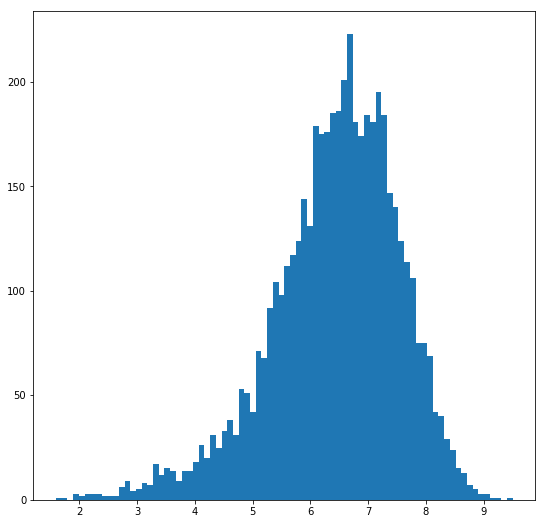

In [16]:
score = imdb.loc[:, 'imdb_score']
plt.hist(score, bins=80)
plt.show()

In [17]:
def hist_col(col):
    plt.hist(col, bins=30, log=True)
    plt.show()

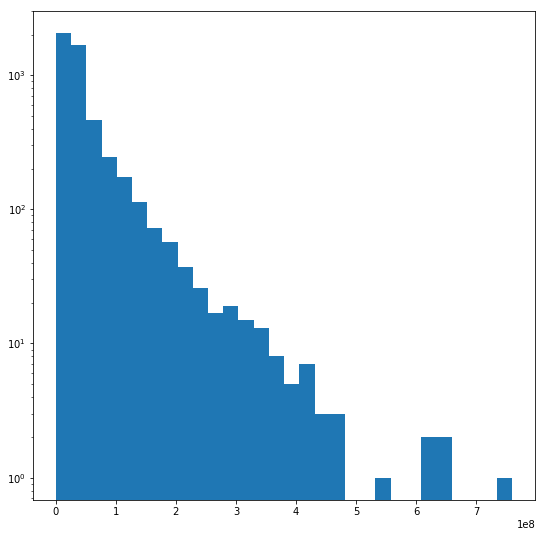

In [18]:
hist_col(gross)

In [19]:
gross.sort_values().head()

3330    162.0
4607    703.0
4606    721.0
3840    728.0
3552    828.0
Name: gross, dtype: float64

In [20]:
gross.sort_values().tail()

17     623279547.0
794    623279547.0
29     652177271.0
26     658672302.0
0      760505847.0
Name: gross, dtype: float64

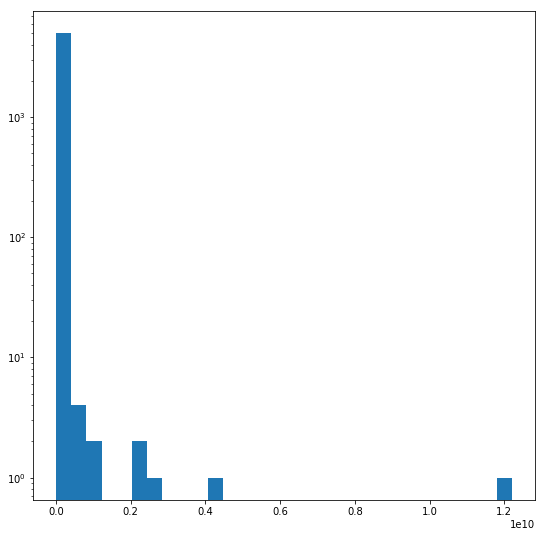

In [21]:
hist_col(budget)

In [22]:
budget.sort_values().head()

4799     218.0
5042    1100.0
5040    1400.0
5036    3250.0
5026    4500.0
Name: budget, dtype: float64

In [23]:
budget.sort_values().tail()

2334    2.127520e+09
2323    2.400000e+09
3005    2.500000e+09
3859    4.200000e+09
2988    1.221550e+10
Name: budget, dtype: float64

In [24]:
imdb.head()

,movie_title,gross,budget,genres,country,imdb_score
0,Avatar,7.605058e+08,2.370000e+08,Action|Adventure|Fantasy|Sci-Fi,USA,7.9
1,Pirates of the Caribbean: At World's End,3.094042e+08,3.000000e+08,Action|Adventure|Fantasy,USA,7.1
2,Spectre,2.000742e+08,2.450000e+08,Action|Adventure|Thriller,UK,6.8
3,The Dark Knight Rises,4.481306e+08,2.500000e+08,Action|Thriller,USA,8.5
4,Star Wars: Episode VII - The Force Awakens ...,4.846841e+07,3.975262e+07,Documentary,NaN,7.1


In [25]:
imdb.describe()

,gross,budget,imdb_score
count,5.043000e+03,5.043000e+03,5043.000000
mean,4.846841e+07,3.975262e+07,6.442138
std,6.216318e+07,1.958004e+08,1.125116
min,1.620000e+02,2.180000e+02,1.600000
25%,8.460992e+06,7.000000e+06,5.800000
50%,3.743230e+07,2.300000e+07,6.600000
75%,5.135707e+07,4.000000e+07,7.200000
max,7.605058e+08,1.221550e+10,9.500000


In [26]:
# Первый квартиль по сборам
quartil_1 = imdb.loc[imdb['gross'] < 8460992]
quartil_1.head()

,movie_title,gross,budget,genres,country,imdb_score
91,The Polar Express,665426.0,165000000.0,Adventure|Animation|Family|Fantasy,USA,6.6
281,Town & Country,6712451.0,90000000.0,Comedy|Romance,New Line,4.4
321,The Adventures of Pluto Nash,4411102.0,100000000.0,Action|Comedy|Sci-Fi,USA,3.8
327,The Flowers of War,9213.0,94000000.0,Drama|History|Romance|War,China,7.6
382,Spy Game,26871.0,92000000.0,Action|Crime|Thriller,Germany,7.0


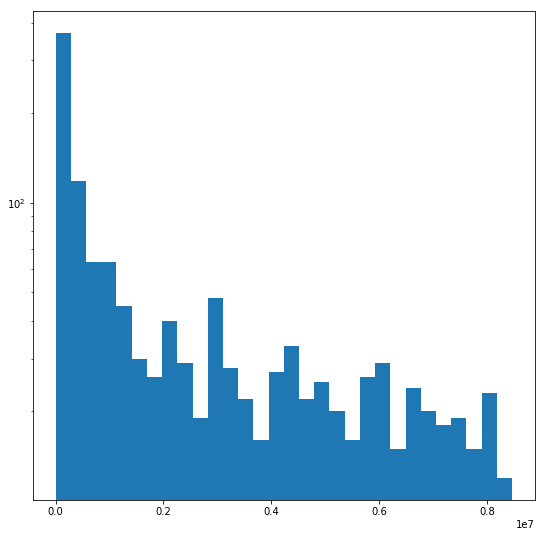

In [27]:
gross = quartil_1.loc[:, 'gross']
hist_col(gross)

In [28]:
# Четвертый квартиль по сборам
quartil_4 = imdb.loc[imdb['gross'] > 51357070]
quartil_4.head()

,movie_title,gross,budget,genres,country,imdb_score
0,Avatar,760505847.0,237000000.0,Action|Adventure|Fantasy|Sci-Fi,USA,7.9
1,Pirates of the Caribbean: At World's End,309404152.0,300000000.0,Action|Adventure|Fantasy,USA,7.1
2,Spectre,200074175.0,245000000.0,Action|Adventure|Thriller,UK,6.8
3,The Dark Knight Rises,448130642.0,250000000.0,Action|Thriller,USA,8.5
5,John Carter,73058679.0,263700000.0,Action|Adventure|Sci-Fi,USA,6.6


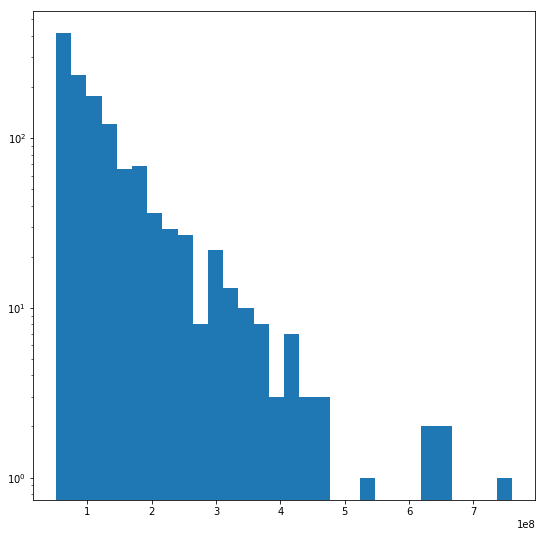

In [29]:
gross = quartil_4.loc[:, 'gross']
hist_col(gross)

In [30]:
quartil_4.corr()

,gross,budget,imdb_score
gross,1.000000,0.520024,0.288544
budget,0.520024,1.000000,0.022112
imdb_score,0.288544,0.022112,1.000000


In [31]:
# Второй и третий квартили по рейтингу
interquartil = imdb.loc[imdb['imdb_score'].between (5.8, 7.2)]
interquartil.head()

,movie_title,gross,budget,genres,country,imdb_score
1,Pirates of the Caribbean: At World's End,3.094042e+08,3.000000e+08,Action|Adventure|Fantasy,USA,7.1
2,Spectre,2.000742e+08,2.450000e+08,Action|Adventure|Thriller,UK,6.8
4,Star Wars: Episode VII - The Force Awakens ...,4.846841e+07,3.975262e+07,Documentary,NaN,7.1
5,John Carter,7.305868e+07,2.637000e+08,Action|Adventure|Sci-Fi,USA,6.6
6,Spider-Man 3,3.365303e+08,2.580000e+08,Action|Adventure|Romance,USA,6.2


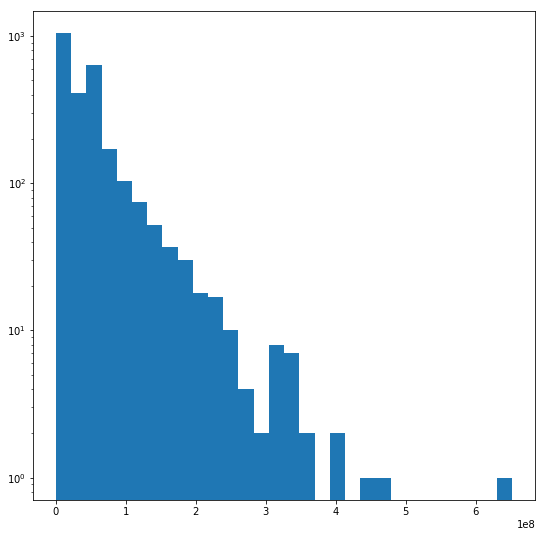

In [32]:
gross = interquartil.loc[:, 'gross']
hist_col(gross)